# End to End Stock Market Pipeline

## Steps in any ML Pipeline

#### * Data Collection
#### * Data Cleaning
#### * Data Visualization and Feature Engineering
#### * Model Selection
#### * Deployment and Testing
#### * Loss Plots


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import sklearn ; Rather we will use it Later when everything else is done and selective models need to be imorted

##Data Collection

In [2]:
from statsmodels.datasets import get_rdataset
df = get_rdataset('Smarket', 'ISLR').data

In [3]:
print(df)

      Year   Lag1   Lag2   Lag3   Lag4   Lag5   Volume  Today Direction
0     2001  0.381 -0.192 -2.624 -1.055  5.010  1.19130  0.959        Up
1     2001  0.959  0.381 -0.192 -2.624 -1.055  1.29650  1.032        Up
2     2001  1.032  0.959  0.381 -0.192 -2.624  1.41120 -0.623      Down
3     2001 -0.623  1.032  0.959  0.381 -0.192  1.27600  0.614        Up
4     2001  0.614 -0.623  1.032  0.959  0.381  1.20570  0.213        Up
...    ...    ...    ...    ...    ...    ...      ...    ...       ...
1245  2005  0.422  0.252 -0.024 -0.584 -0.285  1.88850  0.043        Up
1246  2005  0.043  0.422  0.252 -0.024 -0.584  1.28581 -0.955      Down
1247  2005 -0.955  0.043  0.422  0.252 -0.024  1.54047  0.130        Up
1248  2005  0.130 -0.955  0.043  0.422  0.252  1.42236 -0.298      Down
1249  2005 -0.298  0.130 -0.955  0.043  0.422  1.38254 -0.489      Down

[1250 rows x 9 columns]


In [4]:
df.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [5]:
print(df.head())

   Year   Lag1   Lag2   Lag3   Lag4   Lag5  Volume  Today Direction
0  2001  0.381 -0.192 -2.624 -1.055  5.010  1.1913  0.959        Up
1  2001  0.959  0.381 -0.192 -2.624 -1.055  1.2965  1.032        Up
2  2001  1.032  0.959  0.381 -0.192 -2.624  1.4112 -0.623      Down
3  2001 -0.623  1.032  0.959  0.381 -0.192  1.2760  0.614        Up
4  2001  0.614 -0.623  1.032  0.959  0.381  1.2057  0.213        Up


In [6]:
print(df.tail())

      Year   Lag1   Lag2   Lag3   Lag4   Lag5   Volume  Today Direction
1245  2005  0.422  0.252 -0.024 -0.584 -0.285  1.88850  0.043        Up
1246  2005  0.043  0.422  0.252 -0.024 -0.584  1.28581 -0.955      Down
1247  2005 -0.955  0.043  0.422  0.252 -0.024  1.54047  0.130        Up
1248  2005  0.130 -0.955  0.043  0.422  0.252  1.42236 -0.298      Down
1249  2005 -0.298  0.130 -0.955  0.043  0.422  1.38254 -0.489      Down


### Uncomment each to see what error you might face

In [7]:
# print(df.mean())
# print(df.mean(Volume))
# print(df.mean("Volume"))
# print(df.mean(axis=0))
# print(df.mean(axis=1))
# axis, numeric_only are the only relevant arguments
print(df.mean(numeric_only=True)) # Default axis = 0, mean of columns)
print(df.mean(axis=1, numeric_only=True))


Year      2003.016000
Lag1         0.003834
Lag2         0.003919
Lag3         0.001716
Lag4         0.001636
Lag5         0.005610
Volume       1.478305
Today        0.003138
dtype: float64
0       250.583787
1       250.099687
2       250.168025
3       250.555875
4       250.597713
           ...    
1245    250.839062
1246    250.679976
1247    250.801059
1248    250.752045
1249    250.654443
Length: 1250, dtype: float64


##Data Cleaning

##### Inspect for missing (NaN) values and Duplicates

In [8]:
print("Missing values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())

Missing values:
 Year         0
Lag1         0
Lag2         0
Lag3         0
Lag4         0
Lag5         0
Volume       0
Today        0
Direction    0
dtype: int64

Duplicates: 0


## Visualizations


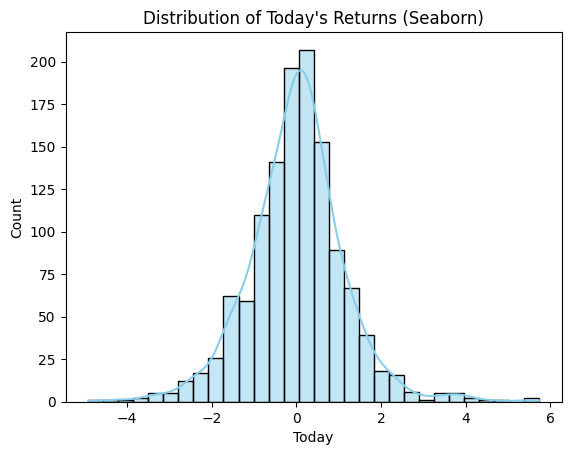

In [9]:
# Histogram with seaborn
sns.histplot(data=df, x="Today", bins=30, kde=True, color="skyblue")
plt.title("Distribution of Today's Returns (Seaborn)")
plt.show()


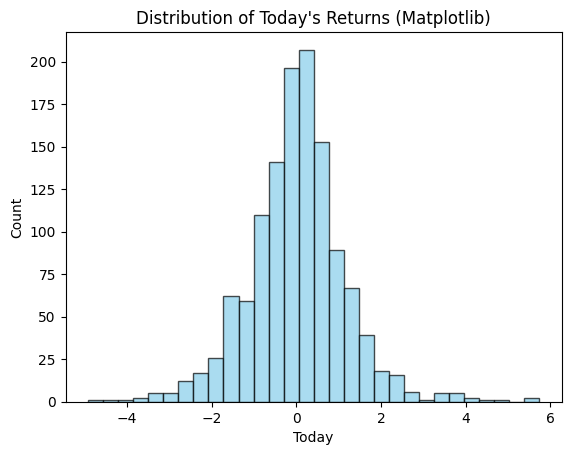

In [11]:
# Histogram with matplotlib
plt.hist(df["Today"], bins=30, color="skyblue", edgecolor="black", alpha=0.7)
plt.title("Distribution of Today's Returns (Matplotlib)")
plt.xlabel("Today")
plt.ylabel("Count")
plt.show()


/tmp/ipython-input-1300451385.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Direction", y="Today", palette="Set2")


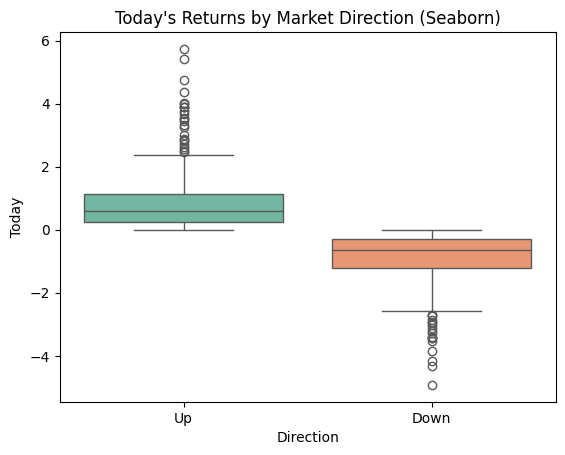

In [12]:
sns.boxplot(data=df, x="Direction", y="Today", palette="Set2")
plt.title("Today's Returns by Market Direction (Seaborn)")
plt.show()


/tmp/ipython-input-392168652.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([up, down], labels=["Up", "Down"])


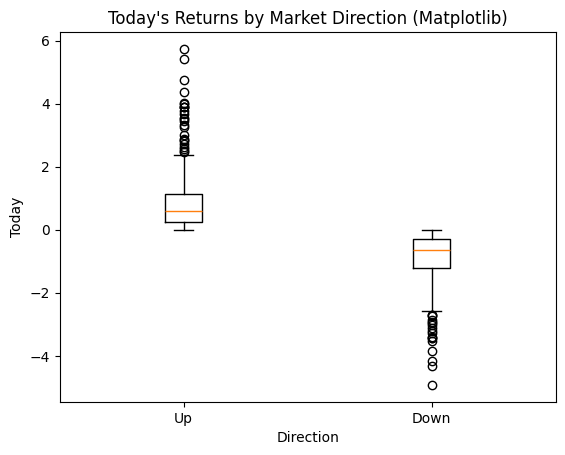

In [14]:
up = df[df["Direction"]=="Up"]["Today"]
down = df[df["Direction"]=="Down"]["Today"]

plt.boxplot([up, down], labels=["Up", "Down"])
plt.title("Today's Returns by Market Direction (Matplotlib)")
plt.xlabel("Direction")
plt.ylabel("Today")
plt.show()


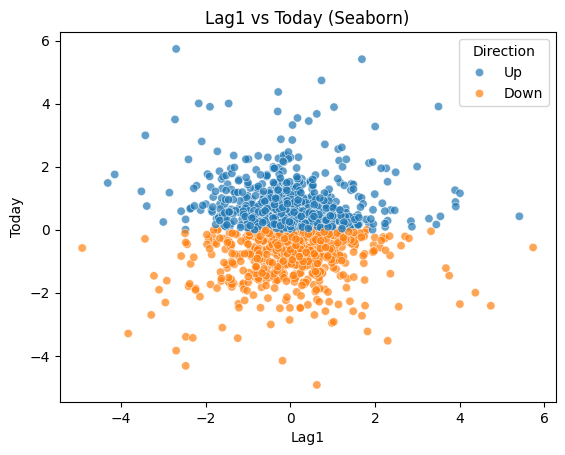

In [22]:
sns.scatterplot(data=df, x="Lag1", y="Today", hue="Direction", alpha=0.7)
plt.title("Lag1 vs Today (Seaborn)")
plt.show()


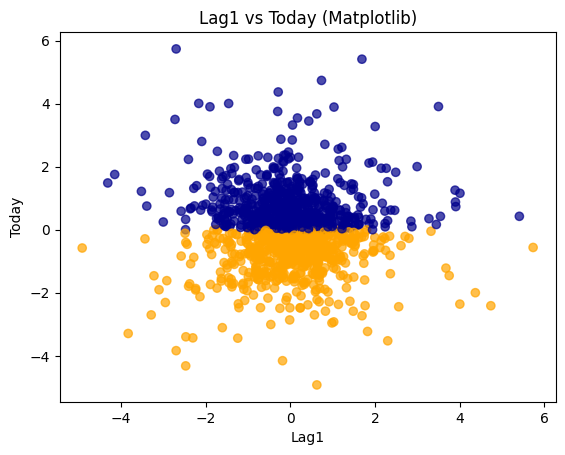

In [20]:
colors = df["Direction"].map({"Up":"darkblue", "Down":"orange"})
plt.scatter(df["Lag1"], df["Today"], c=colors, alpha=0.7)
plt.title("Lag1 vs Today (Matplotlib)")
plt.xlabel("Lag1")
plt.ylabel("Today")
plt.show()


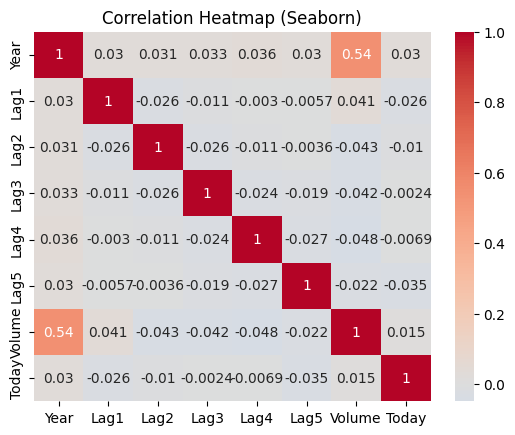

In [23]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Seaborn)")
plt.show()


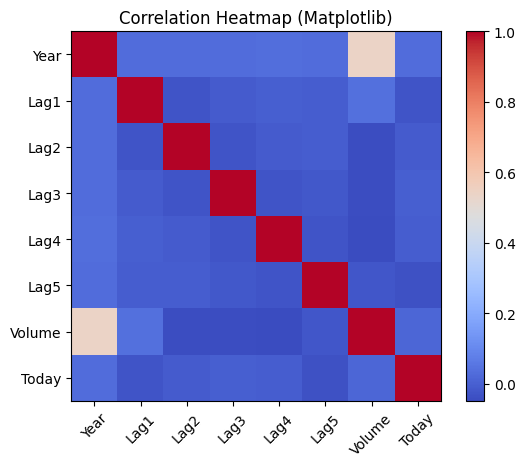

In [24]:
corr = df.corr(numeric_only=True)

plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Correlation Heatmap (Matplotlib)")
plt.show()


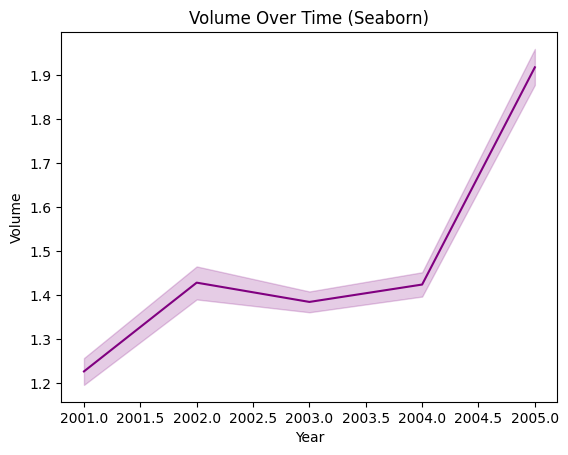

In [25]:
sns.lineplot(data=df, x="Year", y="Volume", color="purple")
plt.title("Volume Over Time (Seaborn)")
plt.show()



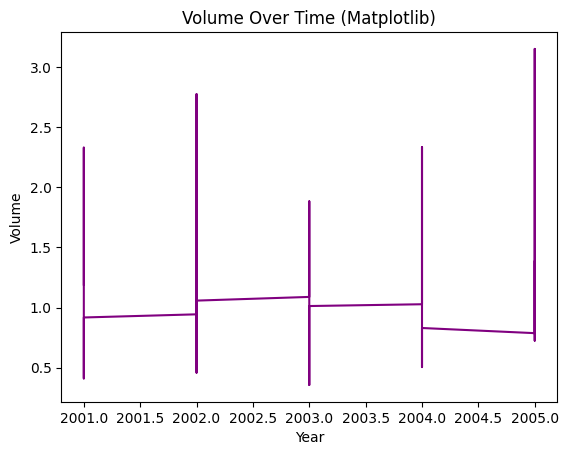

In [26]:
plt.plot(df["Year"], df["Volume"], color="purple")
plt.title("Volume Over Time (Matplotlib)")
plt.xlabel("Year")
plt.ylabel("Volume")
plt.show()


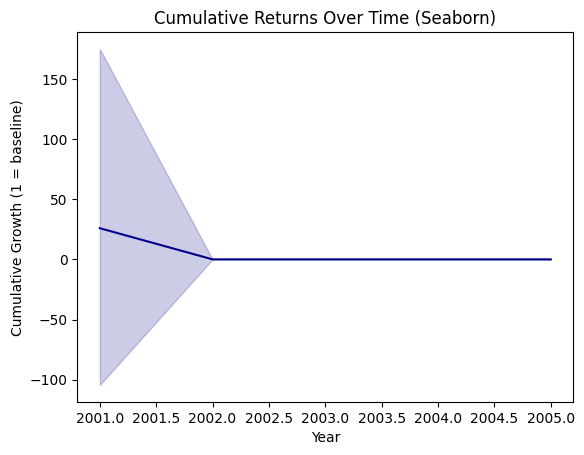

In [27]:
# Compute cumulative returns
df["Cumulative_Returns"] = (1 + df["Today"]).cumprod()

# Plot with seaborn
sns.lineplot(data=df, x="Year", y="Cumulative_Returns", color="darkblue")
plt.title("Cumulative Returns Over Time (Seaborn)")
plt.ylabel("Cumulative Growth (1 = baseline)")
plt.show()


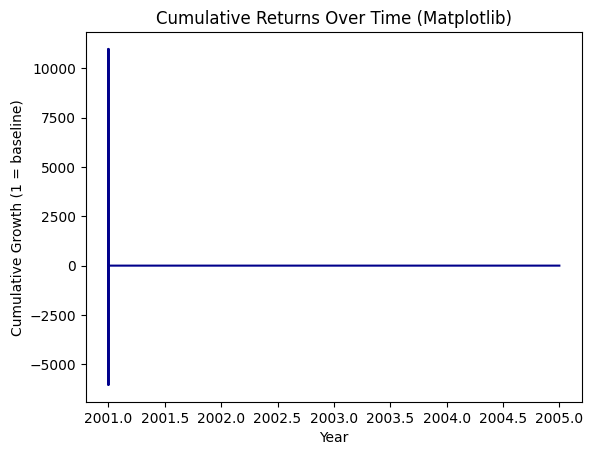

In [28]:
# Compute cumulative returns
df["Cumulative_Returns"] = (1 + df["Today"]).cumprod()

# Plot with matplotlib
plt.plot(df["Year"], df["Cumulative_Returns"], color="darkblue")
plt.title("Cumulative Returns Over Time (Matplotlib)")
plt.xlabel("Year")
plt.ylabel("Cumulative Growth (1 = baseline)")
plt.show()


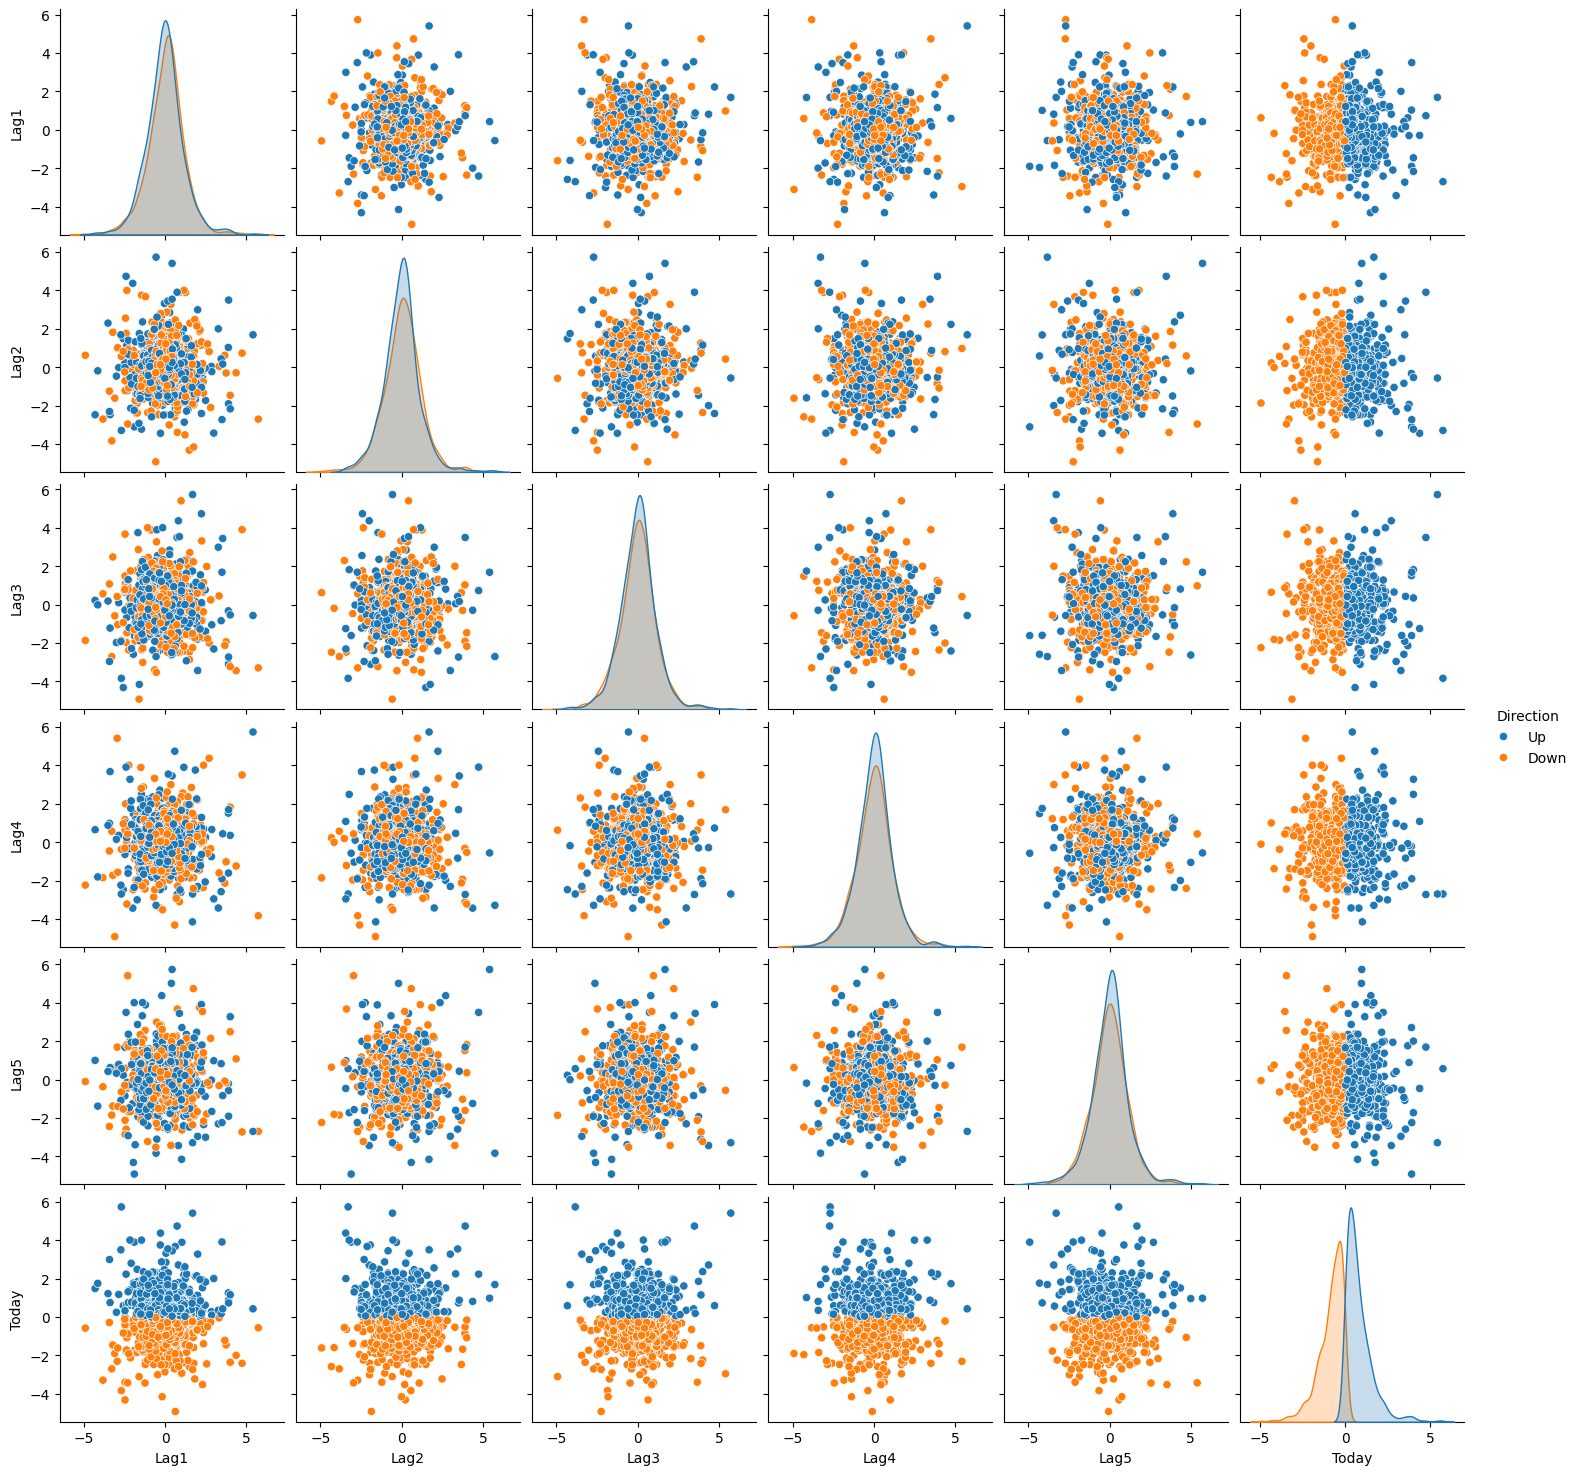

In [42]:
#pairplot
sns.pairplot(df, vars=["Lag1","Lag2","Lag3","Lag4","Lag5","Today"],hue = "Direction")
plt.show()


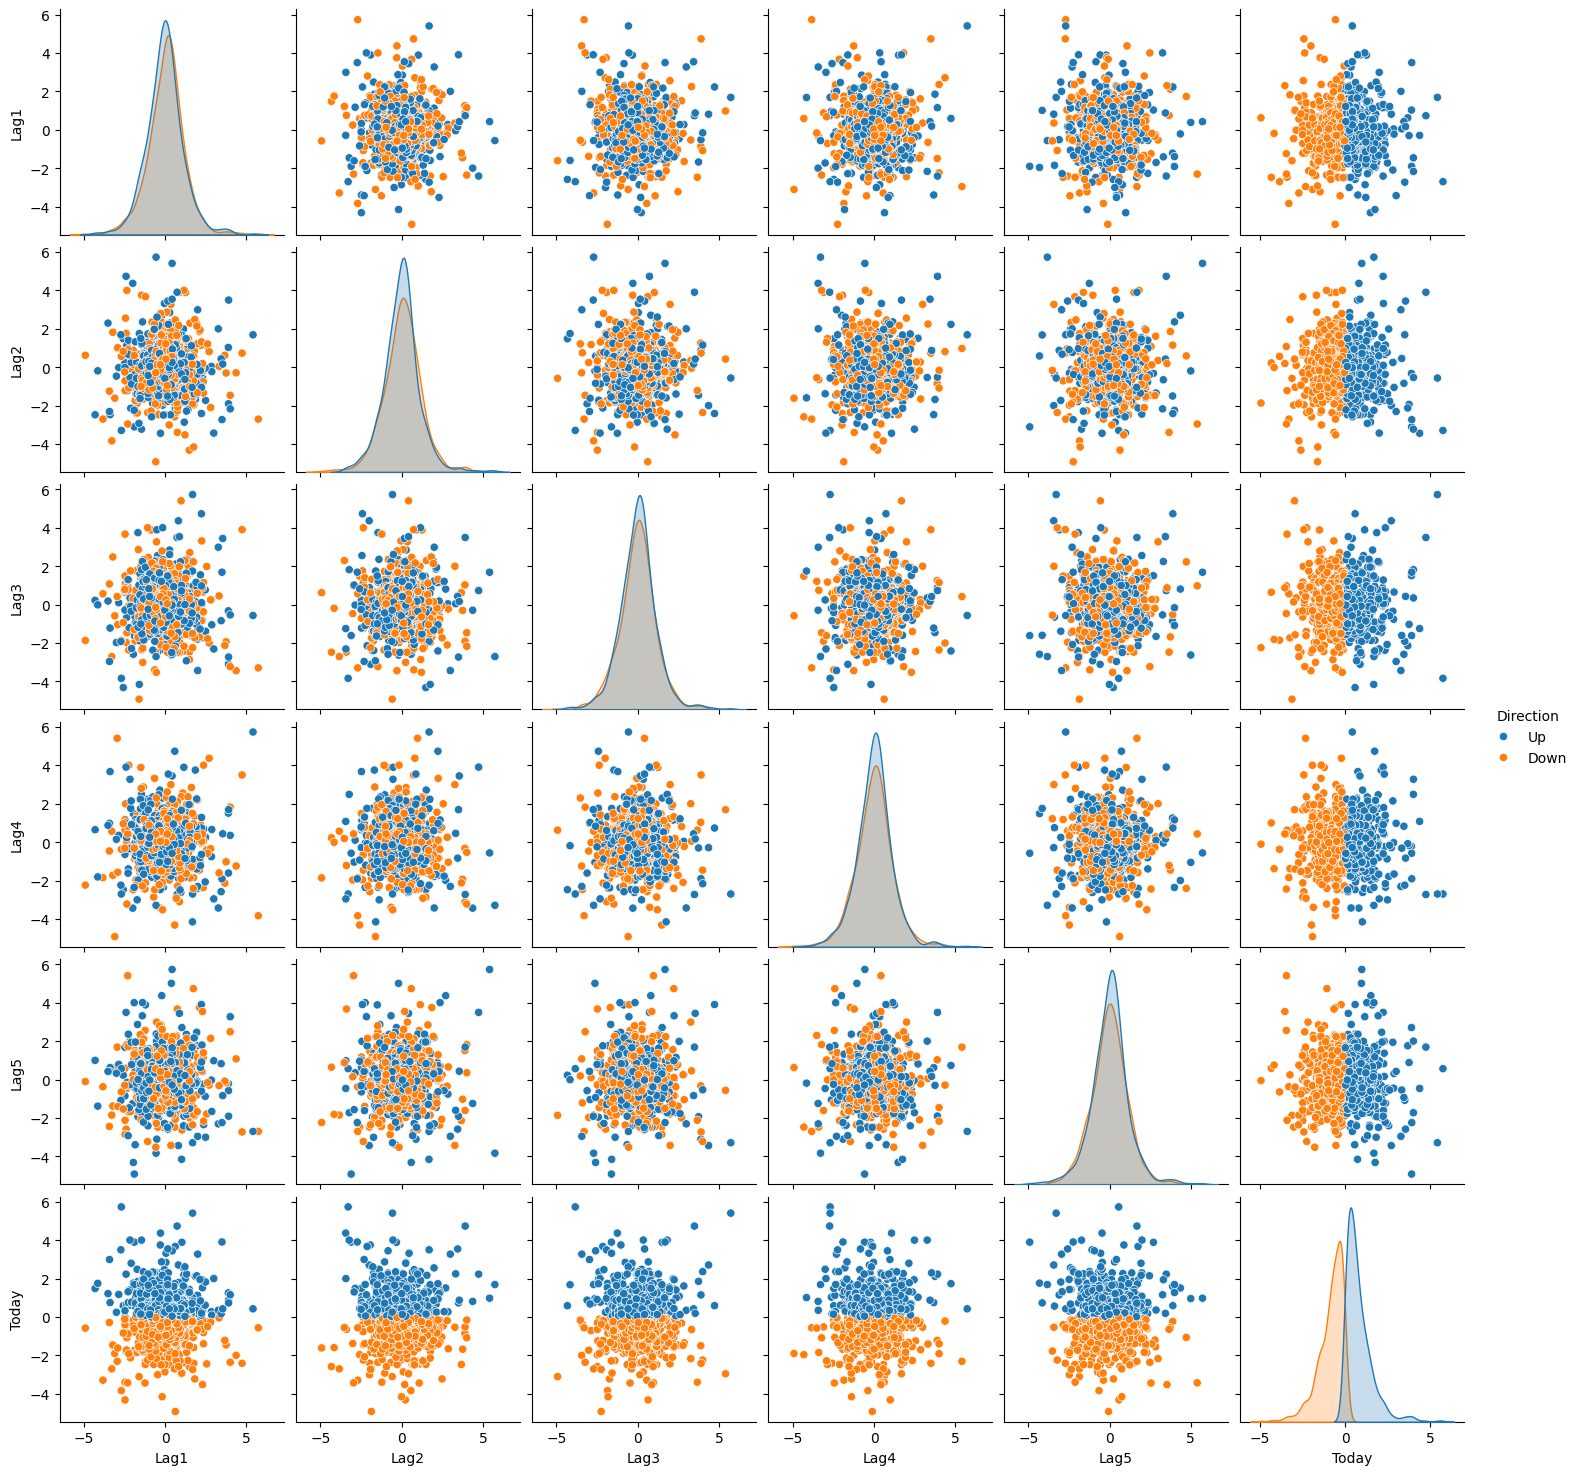

In [40]:
# Pairwise scatter plots with seaborn
sns.pairplot(df, vars=["Lag1","Lag2","Lag3","Lag4","Lag5","Today"], hue="Direction")
plt.show()


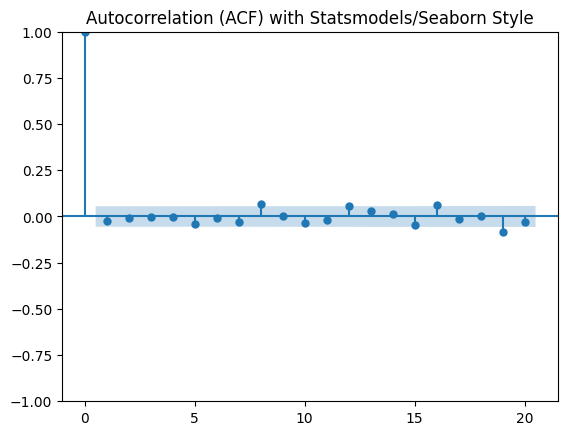

In [31]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df["Today"].dropna(), lags=20)
plt.title("Autocorrelation (ACF) with Seaborn ")
plt.show()


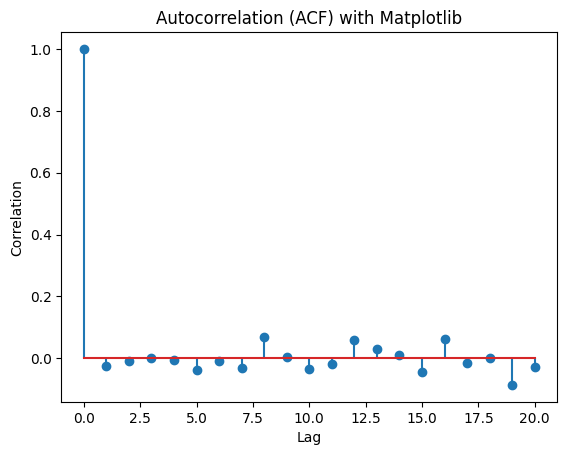

In [33]:
from statsmodels.tsa.stattools import acf

acf_vals = acf(df["Today"].dropna(), nlags=20)
plt.stem(range(len(acf_vals)), acf_vals)
plt.title("Autocorrelation (ACF) with Matplotlib")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.show()


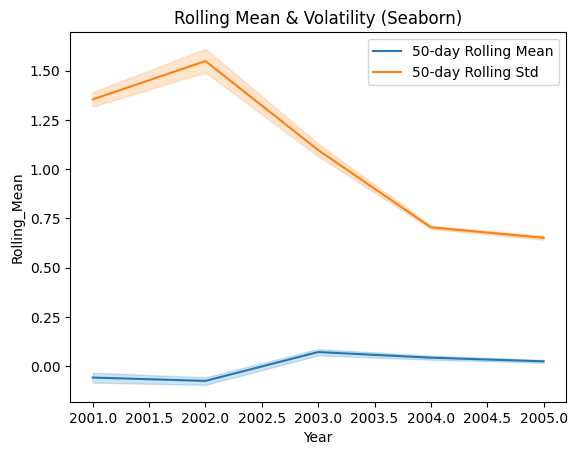

In [37]:
df["Rolling_Mean"] = df["Today"].rolling(50).mean()
df["Rolling_Std"] = df["Today"].rolling(50).std()

sns.lineplot(x=df["Year"], y=df["Rolling_Mean"], label="50-day Rolling Mean")
sns.lineplot(x=df["Year"], y=df["Rolling_Std"], label="50-day Rolling Std")
plt.title("Rolling Mean & Volatility (Seaborn)")
plt.legend()
plt.show()


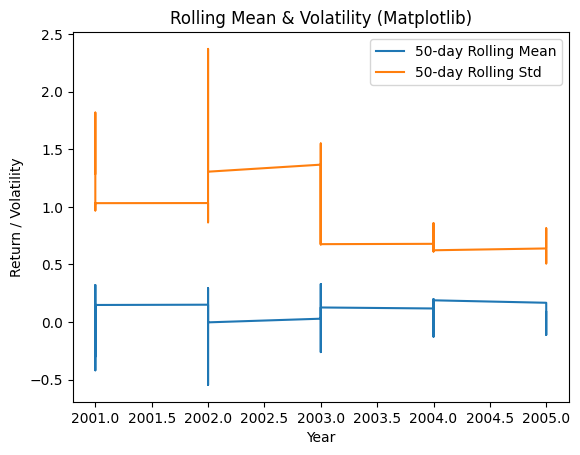

In [38]:
plt.plot(df["Year"], df["Rolling_Mean"], label="50-day Rolling Mean")
plt.plot(df["Year"], df["Rolling_Std"], label="50-day Rolling Std")
plt.title("Rolling Mean & Volatility (Matplotlib)")
plt.xlabel("Year")
plt.ylabel("Return / Volatility")
plt.legend()
plt.show()


##Feature Selection / Engineering

In [43]:
import numpy as np
import pandas as pd

# assume df has columns: 'Today', 'Volume' and a Date column or Year/Month/Day convertible
# If not, adapt accordingly.
# --- safety: make a copy
df_fe = df.copy()

# ensure Date exists
if 'Date' not in df_fe.columns:
    if {'Year','Month','Day'}.issubset(df_fe.columns):
        df_fe['Date'] = pd.to_datetime(df_fe[['Year','Month','Day']])
    else:
        # if index is date-like
        try:
            df_fe['Date'] = pd.to_datetime(df_fe.index)
        except:
            pass

df_fe = df_fe.sort_values('Date').reset_index(drop=True)

# 1) lagged returns
for L in range(1,6):
    df_fe[f'lag{L}'] = df_fe['Today'].shift(L)

# 2) rolling stats (windows) - shift(1) to use only past info
windows = [5, 20, 50]
for w in windows:
    df_fe[f'roll_mean_{w}'] = df_fe['Today'].rolling(window=w).mean().shift(1)
    df_fe[f'roll_std_{w}']  = df_fe['Today'].rolling(window=w).std().shift(1)

# 3) volume features
df_fe['log_vol'] = np.log(df_fe['Volume']).shift(1)
df_fe['vol_pct_change'] = df_fe['Volume'].pct_change().shift(1)
df_fe['vol_ma20'] = df_fe['Volume'].rolling(20).mean().shift(1)
df_fe['vol_ma_ratio_20'] = df_fe['Volume'] / (df_fe['vol_ma20'] + 1e-9)

# 4) volume spike indicator (z-score)
df_fe['vol_zscore_20'] = ((df_fe['Volume'] - df_fe['vol_ma20']) / (df_fe['Volume'].rolling(20).std().shift(1) + 1e-9)).shift(1)
df_fe['vol_spike'] = (df_fe['vol_zscore_20'].abs() > 2).astype(int)

# 5) squared returns as volatility proxy
df_fe['sq_return'] = (df_fe['Today']**2).shift(1)

# 6) direction/run length
df_fe['direction'] = (df_fe['Today'] > 0).astype(int)
df_fe['prev_direction'] = df_fe['direction'].shift(1)
df_fe['dir_change'] = (df_fe['direction'] != df_fe['direction'].shift(1)).astype(int)
df_fe['run_id'] = df_fe['dir_change'].cumsum()
df_fe['run_length'] = df_fe.groupby('run_id').cumcount().shift(1).fillna(0).astype(int)

# 7) interactions
df_fe['lag1_volratio'] = df_fe['lag1'] * df_fe['vol_ma_ratio_20']
df_fe['lag1_lag2'] = df_fe['lag1'] * df_fe['lag2']

# 8) RSI (14)
delta = df_fe['Today'].diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)
avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()
rs = avg_gain / (avg_loss + 1e-9)
df_fe['rsi_14'] = 100 - (100 / (1 + rs)).shift(1)

# 9) MACD (12,26) and signal
ema12 = df_fe['Today'].ewm(span=12, adjust=False).mean()
ema26 = df_fe['Today'].ewm(span=26, adjust=False).mean()
df_fe['macd'] = (ema12 - ema26).shift(1)
df_fe['macd_signal'] = df_fe['macd'].ewm(span=9, adjust=False).mean().shift(1)

# final cleaning: drop rows with NaNs resulting from shifts/rolling
df_fe = df_fe.dropna().reset_index(drop=True)


In [44]:
df

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Cumulative_Returns,Rolling_Mean,Rolling_Std
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up,1.959000,NaN,NaN
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up,3.980688,NaN,NaN
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down,1.500719,NaN,NaN
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up,2.422161,NaN,NaN
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up,2.938081,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up,0.000000,0.15246,0.654953
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down,0.000000,0.11682,0.665892
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up,0.000000,0.11348,0.665388
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down,0.000000,0.12762,0.648431


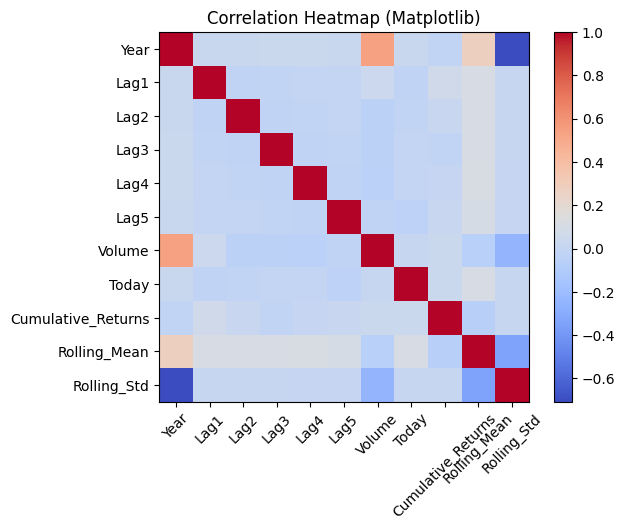

In [46]:
corr = df.corr(numeric_only=True)

plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Correlation Heatmap (Matplotlib)")
plt.show()


### From the additionally generated columns, filter out corrupt values

In [66]:
# remove rows where df['col'] is NaN/None
df_clean = df.dropna(subset=['Rolling_Mean']).reset_index(drop=True)


##Model Selection and Training
####Volume and Rolling Mean have the highest positive correlation, wrt Year- So only these 3 features we will be taking

In [67]:
from sklearn.model_selection import train_test_split

X=df_clean[['Volume','Rolling_Mean','Year']]
Y=df_clean['Direction']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [68]:
X_train

,Volume,Rolling_Mean,Year
1166,2.21446,0.02002,2005
746,1.38850,-0.01074,2004
413,1.46340,0.07510,2002
936,1.43610,0.11904,2004
533,1.37960,0.22720,2003
...,...,...,...
1044,2.26632,-0.02336,2005
1095,1.71687,0.09144,2005
1130,2.31925,-0.01820,2005
860,1.19220,-0.04850,2004


In [69]:
X_test

,Volume,Rolling_Mean,Year
243,1.20880,0.02594,2002
1024,2.21705,-0.06884,2005
233,1.39220,0.00104,2002
70,1.83236,-0.00518,2001
363,1.37210,-0.18204,2002
...,...,...,...
83,1.34350,-0.06722,2001
240,1.21020,0.02062,2002
622,1.15130,0.05220,2003
319,1.82300,-0.27736,2002


In [70]:
Y_train

,Direction
1166,Up
746,Down
413,Up
936,Up
533,Up
...,...
1044,Up
1095,Up
1130,Down
860,Up


In [71]:
Y_test

,Direction
243,Up
1024,Up
233,Up
70,Up
363,Down
...,...
83,Down
240,Down
622,Up
319,Up


In [72]:
# GridSearch for multiple classifiers (KNN, Logistic, SVM, DecisionTree, RF, GradientBoosting)
import numpy as np
import joblib
from time import time
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit, StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# ---------- Choose CV ----------
cv_type = 'time'   # 'time' for TimeSeriesSplit, 'strat' for StratifiedKFold
n_splits = 5

if cv_type == 'time':
    cv = TimeSeriesSplit(n_splits=n_splits)
else:
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# ---------- Small parameter grids (adjustable) ----------
grids = {}

# KNN (needs scaling)
grids['KNN'] = {
    'estimator': Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]),
    'param_grid': {
        'knn__n_neighbors': [3, 5, 9],
        'knn__weights': ['uniform', 'distance'],
        'knn__metric': ['minkowski', 'euclidean']
    }
}

# Logistic Regression (scaling + penalty)
grids['Logistic'] = {
    'estimator': Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression(solver='liblinear', max_iter=1000))]),
    'param_grid': {
        'clf__C': [0.01, 0.1, 1.0, 10.0],
        'clf__penalty': ['l1', 'l2']
    }
}

# SVM (scaling) - probability=True to get predict_proba
grids['SVM'] = {
    'estimator': Pipeline([('scaler', StandardScaler()), ('svc', SVC(probability=True))]),
    'param_grid': {
        'svc__C': [0.1, 1.0, 10.0],
        'svc__kernel': ['linear', 'rbf'],
        'svc__gamma': ['scale', 'auto']
    }
}

# Decision Tree (no scaling required)
grids['DecisionTree'] = {
    'estimator': DecisionTreeClassifier(random_state=0),
    'param_grid': {
        'max_depth': [3, 5, None],
        'min_samples_leaf': [1, 3, 5]
    }
}

# Random Forest
grids['RandomForest'] = {
    'estimator': RandomForestClassifier(n_jobs=-1, random_state=0),
    'param_grid': {
        'n_estimators': [100, 200],
        'max_depth': [5, None],
        'max_features': ['sqrt', 0.5]
    }
}

# Gradient Boosting (sklearn)
grids['GradBoost'] = {
    'estimator': GradientBoostingClassifier(random_state=0),
    'param_grid': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    }
}

# Optionally include XGBoost if installed
try:
    from xgboost import XGBClassifier
    grids['XGBoost'] = {
        'estimator': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0, n_jobs=-1),
        'param_grid': {
            'n_estimators': [100, 200],
            'learning_rate': [0.05, 0.1],
            'max_depth': [3, 5]
        }
    }
    print("XGBoost found and included in search.")
except Exception:
    print("XGBoost not available — skipping it.")

# ---------- Run GridSearchCV for each model ----------
results = {}
for name, cfg in grids.items():
    estimator = cfg['estimator']
    param_grid = cfg['param_grid']
    print("\n" + "="*60)
    print(f"Running GridSearchCV for: {name}")
    gs = GridSearchCV(estimator=estimator,
                      param_grid=param_grid,
                      cv=cv,
                      scoring='roc_auc',
                      n_jobs=-1,
                      verbose=1,
                      refit=True)
    t0 = time()
    gs.fit(X_train, Y_train)
    t1 = time()
    print(f"Done {name} in {t1-t0:.1f}s. Best CV AUC: {gs.best_score_:.4f}")
    print("Best params:", gs.best_params_)

    # Evaluate on test set
    best = gs.best_estimator_
    probs = best.predict_proba(X_test)[:,1]
    preds = (probs >= 0.5).astype(int)
    auc = roc_auc_score(Y_test, probs)
    acc = accuracy_score(Y_test, preds)
    cm = confusion_matrix(Y_test, preds)
    cr = classification_report(Y_test, preds, digits=4)
    print(f"Test AUC: {auc:.4f} | Test Acc: {acc:.4f}")
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", cr)

    # Save results and the model
    results[name] = {
        'gridsearch': gs,
        'best_estimator': best,
        'cv_best_score': gs.best_score_,
        'test_auc': auc,
        'test_acc': acc
    }
    joblib.dump(best, f"best_model_{name}.joblib")
    print(f"Saved best_model_{name}.joblib")

# ---------- Summary ----------
print("\n" + "="*60)
print("Summary of models:")
for name, info in results.items():
    print(f"{name:12s} | CV AUC: {info['cv_best_score']:.4f} | Test AUC: {info['test_auc']:.4f} | Test Acc: {info['test_acc']:.4f}")


XGBoost found and included in search.

Running GridSearchCV for: KNN
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Done KNN in 0.9s. Best CV AUC: 0.5639
Best params: {'knn__metric': 'minkowski', 'knn__n_neighbors': 3, 'knn__weights': 'distance'}


TypeError: Labels in y_true and y_pred should be of the same type. Got y_true=['Down' 'Up'] and y_pred=[0 1]. Make sure that the predictions provided by the classifier coincides with the true labels.

### Above Issue is caused due to lack of ENCODING

In [73]:
df_clean['Direction'] = df_clean['Direction'].map({'Up': 1, 'Down': 0})


In [75]:
X=df_clean[['Volume','Rolling_Mean','Year']]
Y=df_clean['Direction']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

##Training + Testing

In [78]:
# Directly Jumpimg at GridSearch : This trains, and evaluates as well
import numpy as np
import joblib
from time import time
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit, StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# ---------- Choose CV ----------
cv_type = 'time'   # 'time' for TimeSeriesSplit, 'strat' for StratifiedKFold
n_splits = 5

if cv_type == 'time':
    cv = TimeSeriesSplit(n_splits=n_splits)
else:
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)




grids = {}

# KNN
grids['KNN'] = {
    'estimator': Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]),
    'param_grid': {
        'knn__n_neighbors': [3, 5, 7, 9],
        'knn__weights': ['uniform', 'distance'],
        'knn__metric': ['minkowski', 'euclidean']
    }
}

# Logistic Regression
grids['Logistic'] = {
    'estimator': Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression(solver='liblinear', max_iter=1000))]),
    'param_grid': {
        'clf__C': [0.01, 0.1, 1.0, 10.0],
        'clf__penalty': ['l1', 'l2',]

    }
}

# SVM Why Scaling needed?
grids['SVM'] = {
    'estimator': Pipeline([('scaler', StandardScaler()), ('svc', SVC(probability=True))]),
    'param_grid': {
        'svc__C': [0.01, 0.1, 1.0, 10.0],
        'svc__kernel': ['linear', 'rbf','poly'],
        'svc__gamma': ['scale', 'auto']
    }
}

# Decision Tree
grids['DecisionTree'] = {
    'estimator': DecisionTreeClassifier(random_state=0),
    'param_grid': {
        'max_depth': [3, 5, None],
        'min_samples_leaf': [1, 3, 5],
        'criterion': ['gini', 'entropy']
    }
}

# Random Forest
grids['RandomForest'] = {
    'estimator': RandomForestClassifier(n_jobs=-1, random_state=0),
    'param_grid': {
        'n_estimators': [100, 150, 200, 250, 300],
        'max_depth': [5, None],
        'max_features': ['sqrt', 0.5]
    }
}

# Gradient Boosting
grids['GradBoost'] = {
    'estimator': GradientBoostingClassifier(random_state=0),
    'param_grid': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 5]
    }
}


# # # # # # # # # # # # # # #
results = {}
for name, cfg in grids.items():
    estimator = cfg['estimator']
    param_grid = cfg['param_grid']
    print("\n" + "="*60)
    print(f"Running GridSearchCV for: {name}")
    gs = GridSearchCV(estimator=estimator,
                      param_grid=param_grid,
                      cv=cv,
                      scoring='roc_auc',
                      n_jobs=-1,
                      verbose=1,
                      refit=True)
    t0 = time()
    gs.fit(X_train, Y_train)
    t1 = time()
    print(f"Done {name} in {t1-t0:.1f}s. Best CV AUC: {gs.best_score_:.4f}")
    print("Best params:", gs.best_params_)

    # Evaluate on test set
    best = gs.best_estimator_
    probs = best.predict_proba(X_test)[:,1]
    preds = (probs >= 0.5).astype(int)
    auc = roc_auc_score(Y_test, probs)
    acc = accuracy_score(Y_test, preds)
    cm = confusion_matrix(Y_test, preds)
    cr = classification_report(Y_test, preds, digits=4)
    print(f"Test AUC: {auc:.4f} | Test Acc: {acc:.4f}")
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", cr)

    # Save results and the model
    results[name] = {
        'gridsearch': gs,
        'best_estimator': best,
        'cv_best_score': gs.best_score_,
        'test_auc': auc,
        'test_acc': acc
    }
    joblib.dump(best, f"best_model_{name}.joblib")
    print(f"Saved best_model_{name}.joblib")

# ---------- Summary ----------
print("\n" + "="*60)
print("Summary of models:")
for name, info in results.items():
    print(f"{name:12s} | CV AUC: {info['cv_best_score']:.4f} | Test AUC: {info['test_auc']:.4f} | Test Acc: {info['test_acc']:.4f}")



Running GridSearchCV for: KNN
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Done KNN in 7.8s. Best CV AUC: 0.5639
Best params: {'knn__metric': 'minkowski', 'knn__n_neighbors': 3, 'knn__weights': 'distance'}
Test AUC: 0.5176 | Test Acc: 0.4979
Confusion Matrix:
 [[57 74]
 [47 63]]
Classification Report:
               precision    recall  f1-score   support

           0     0.5481    0.4351    0.4851       131
           1     0.4599    0.5727    0.5101       110

    accuracy                         0.4979       241
   macro avg     0.5040    0.5039    0.4976       241
weighted avg     0.5078    0.4979    0.4965       241

Saved best_model_KNN.joblib

Running GridSearchCV for: Logistic
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Done Logistic in 0.8s. Best CV AUC: 0.5570
Best params: {'clf__C': 0.1, 'clf__penalty': 'l1'}
Test AUC: 0.5128 | Test Acc: 0.4896
Confusion Matrix:
 [[36 95]
 [28 82]]
Classification Report:
               precision    recall  f